# Programming Skills 2
## Exploratory Data Analysis (EDA) of AIA Data
In this notebook, are roughly *a* solution to the instructions given in Programming Skills 2, which are an example exploratory data analysis of a small subset of data from the Atmospheric Imaging Assembly onboard NASA's Solar Dynamics Observatory. The data were retrieved from the [JSOC Database](http://jsoc.stanford.edu/) using this data query: aia.lev1_euv_12s[2014-10-13T00:00:00Z/10d@6h][171]{image}

### Imports
First, let's import some helpful packages.

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sunpy
import sunpy.map
import os
import sunpy.visualization.colormaps

%matplotlib inline

### Downloading Data
We use a common terminal command called `wget` to download all of the data from this html page. You may need to [download the wget tool](https://www.gnu.org/software/wget/) if you are using it for the first time. Other libraries that can be used for data downloads are `drms` for JSOC downloads, `urllib`, or even `pandas` (for csv), and many more!

For me, the full data download took ~1 min, but could vary based on your internet download speed. If it takes too long, you can stop the download and continue with this tutorial with only a few files. The `-r` flag used in the command below means "recursive" (i.e. download all files) and the `-q` flag means "quiet" (don't output a bunch of information into the terminal about the files being downloaded). More info on how to use wget can be found [here](https://www.gnu.org/software/wget/manual/). The exclamation mark tells jupyter notebook that we are using a terminal command rather than Python.


In [43]:
!wget -rq https://jsoc1.stanford.edu/SUM2/D1515570274/S00000/

The data is downloaded into a path on our computer, which is "jsoc1.stanford.edu/SUM2/D1515570274/S00000/" by default. Feel free to change this path. Let's use the os package to find every file in this folder and put it into a list that can be referenced. The `os` library is very useful for managing directories and paths on our computer.

In [44]:
data_path = 'jsoc1.stanford.edu/SUM2/D1515570274/S00000' 
images = os.listdir(data_path) # create a list of all the file names of files in the directory
im_list = [os.path.join(data_path, str(im)) for im in images] # create a list of all the full paths of files
im_list[0] # display the first result for a sanity check

'jsoc1.stanford.edu/SUM2/D1515570274/S00000/aia.lev1_euv_12s.2014-10-13T060012Z.171.image_lev1.fits'

## Data Exploration
How many files do we have?

In [45]:
len(images)

7

Let's use `sunpy` to create a map of our image and display some useful info about a single file in our file list. `astropy` is another great package for this.

Observatory,SDO
Instrument,AIA 3
Detector,AIA
Measurement,171.0 Angstrom
Wavelength,171.0 Angstrom
Observation Date,2014-10-13 18:00:11
Exposure Time,2.000192 s
Dimension,[4096. 4096.] pix
Coordinate System,helioprojective
Scale,[0.59948897 0.59948897] arcsec / pix
Reference Pixel,[2052.7800293 2046.93994141] pix

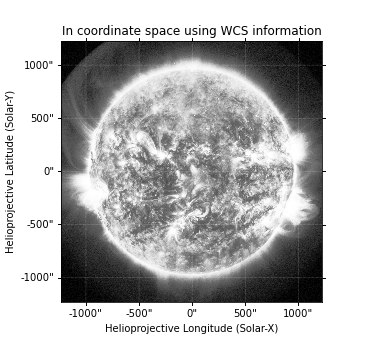
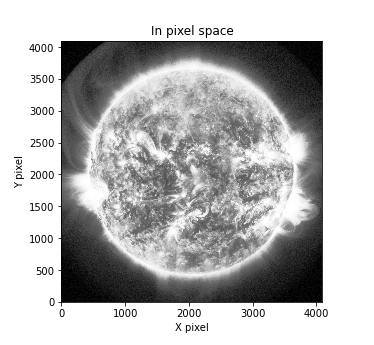
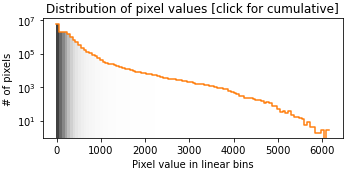
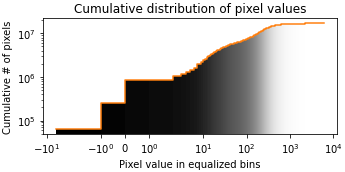

In [63]:
n=2
aia_map = sunpy.map.Map(im_list[n])
aia_map

That's pretty cool! We have lots of useful information and a plot. A fits file contains a header, which contains all of the information displayed in the table of the sunpy Map above.
Maps also have their own methods, like `plot()` and properties like `fits_header` for accessing different attributes of the data. We can also use `help(aia_map)` to see some more info about the map object and its header.

Let's try to print some of the header data. 

In [49]:
aia_map.fits_header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / data type of original image                    
NAXIS   =                    2 / dimension of original image                    
NAXIS1  =                 4096 / length of original image axis                  
NAXIS2  =                 4096 / length of original image axis                  
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
XTENSION= 'BINTABLE'           / binary table extension                         
BLD_VERS= 'V8R6X   '                                                            
LVL_NUM =                  1.0 / LVL_NUM data level number                      
T_REC   = '2014-10-13T18:00:01.000' / [ISO] Slotted observation time            
TRECSTEP=                 12.0 / [second] T_REC step {T_REC_step}               
TRECEPOC= '1993.01.01_00:00:

### Plotting
Now, try plotting the data in the image in a more pretty way. We use the `sunpy.visualization.colormaps` package to change the color scale.

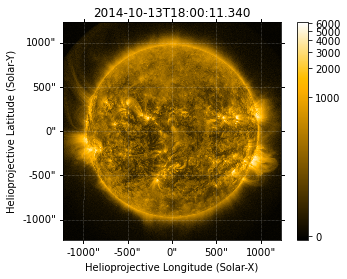

In [50]:
aia_map.plot_settings['title'] = f"{aia_map.date.value}"
aia_map.plot_settings['cmap'] = plt.get_cmap('sdoaia171')  
fig = plt.figure()
aia_map.plot()
plt.colorbar()
plt.show()

We can also plot this using `plt.imshow()` too using different color axes. Note that the axes are not labeled for us though as they are in `sunpy.plot()`.

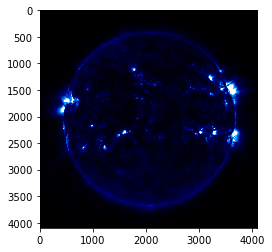

In [51]:
cmap = plt.get_cmap('sswidlsoholasco3')
plt.imshow(aia_map.data, cmap=cmap)
plt.show()

## Preparing tabular data
Now, we want to put the header files of the images in a more useable format. Here, we choose to use a pandas dataframe, building off of the programming tutorial 1.

First, we want to get arrays of the header file information. Then, we can easily create a pandas dataframe.

In [53]:
date = []
min_arr, max_arr, mean_arr = [],[],[]
dsun_obs, wavelength = [], []
for im in im_list:
    if im.endswith('.fits'):
        aia_map0 = sunpy.map.Map(im)
        date.append(aia_map0.date.value)
        hdr = aia_map0.fits_header
        min_arr.append(hdr['DATAMIN'])
        max_arr.append(hdr['DATAMAX'])
        mean_arr.append(hdr['DATAMEAN'])
        dsun_obs.append(hdr['DSUN_OBS'])
        wavelength.append(hdr['WAVELNTH'])
    

In [58]:
# Make a pandas dataframe
header_df = pd.DataFrame(zip(images, date, min_arr, max_arr, mean_arr, dsun_obs, wavelength), columns = ['file', 'date', 'min value', 'max value', 'mean value', 'dsun_obs', 'wavelength'])
header_df.head()

,file,date,min value,max value,mean value,dsun_obs,wavelength
0,aia.lev1_euv_12s.2014-10-13T060012Z.171.image_...,2014-10-13T06:00:11.341,-5,6929,204.520996,1.493066e+11,171
1,index.html,2014-10-13T18:00:11.340,-6,6155,208.585617,1.492093e+11,171
2,aia.lev1_euv_12s.2014-10-13T180012Z.171.image_...,2014-10-14T12:00:11.344,-7,6953,204.724289,1.492174e+11,171
3,aia.lev1_euv_12s.2014-10-14T120012Z.171.image_...,2014-10-14T00:00:11.343,-6,6831,205.483765,1.492358e+11,171
4,aia.lev1_euv_12s.2014-10-14T000012Z.171.image_...,2014-10-14T06:00:11.341,-6,16210,207.341278,1.492647e+11,171


Now, we can just use ideas from the programming tutorial 1 to finish the rest of these TO DO items.

## Basic Calculations

## Write a function

## Plotting

In [78]:
from matplotlib.animation import FuncAnimation
from IPython import display


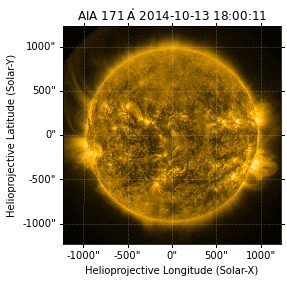

In [67]:
im = aia_map.plot()

In [89]:
aia[0] = sunpy.map.Map(im_list[0])
aia[1] = sunpy.map.Map(im_list[2])

ModuleNotFoundError: No module named 'sunpy.wcs'

ValueError: Unknown projection 'wcs'

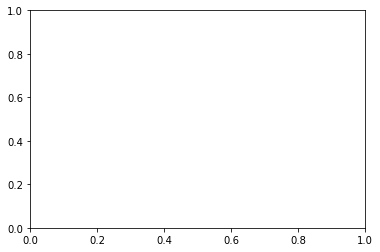

In [92]:
fig, ax = plt.subplots()
ax = plt.subplot(111, projection='wcs')
# image half down sequence to get better scaling
# plot_obj = aia[len(aia) // 2].plot()
plt_obj = im1.plot()
def animate(i):
    ax.set_title("AIA %s %s" % (aia[i].meta['wave_str'], aia[i].meta['t_obs'][:-8]))
    plt_obj.set_data(aia[i].data)
    return (plt_obj,)

anim = FuncAnimation(fig, animate, init_func=None, frames=len(aia), interval=500, blit=True)
plt.close(fig)
display.HTML(anim.to_html5_video())